<a href="https://colab.research.google.com/github/Siddhisalvi/Machine-learning-Deep-learning/blob/main/Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def load_dataset(data_dir):
    """
    Load image dataset from a directory.

    Args:
        data_dir (str): Path to the dataset directory.

    Returns:
        tuple: A tuple containing the feature array and label array.
    """
    features = []
    labels = []
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # resize image to 224x224
            img = img.flatten()  # flatten image
            features.append(img)
            labels.append(class_dir)
    features = np.array(features)
    labels = np.array(labels)
    return features, labels


In [4]:
# Load dataset
data_dir = "/content/drive/MyDrive/rice_leaf_diseases"
features, labels = load_dataset(data_dir)

In [5]:
orb_det=cv2.imread("/content/drive/MyDrive/rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG")
orb_det2=cv2.imread("/content/drive/MyDrive/rice_leaf_diseases/Bacterial leaf blight/DSC_0380.JPG")
orb_det=cv2.resize(orb_det,(100,100))
orb_det2=cv2.resize(orb_det2,(100,100))

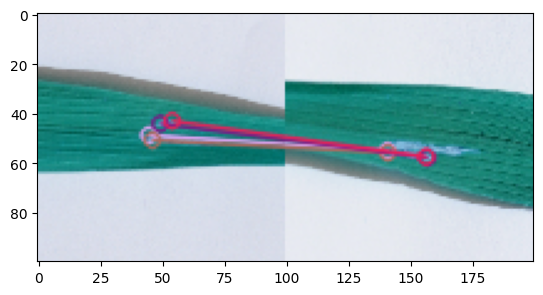

In [6]:
orb=cv2.ORB_create(nfeatures=120)
kp1,features_=orb.detectAndCompute(orb_det,None)
kp2,des2=orb.detectAndCompute(orb_det2,None)
matcher=cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
brute_force=cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches=brute_force.match(features_,des2)
matches=sorted(matches,key=lambda x:x.distance)
result=cv2.drawMatches(orb_det,kp1,orb_det2,kp2,matches,orb_det2,flags=2)

plt.imshow(result)

Test accuracy: 0.8125
Predicted class for image1: Bacterial leaf blight


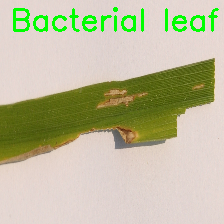

Predicted class for image2: Leaf smut


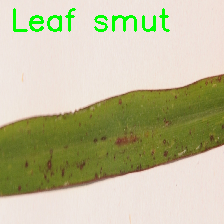

Predicted class for image3: Healthy


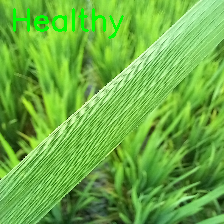

In [7]:

# Create label encoder
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape data for Random Forest classifier
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
X_train = np.reshape(X_train, (num_samples_train, -1))
X_test = np.reshape(X_test, (num_samples_test, -1))

# Create Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifier on training set
rf.fit(X_train, y_train)

# Evaluate classifier on test set
accuracy = rf.score(X_test, y_test)
print("Test accuracy:", accuracy)

# Make predictions on a single image
img_path = "/content/drive/MyDrive/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG"
img = cv2.imread(img_path)
img_orig = cv2.resize(img, (224, 224))
img = img_orig.flatten()
img = np.array([img])
prediction = rf.predict(img)
class_name = le.inverse_transform(prediction)
print("Predicted class for image1:", class_name[0])

# Print predicted image
cv2.putText(img_orig, class_name[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(img_orig)

# Make predictions on another image
img_path = "/content/drive/MyDrive/rice_leaf_diseases/Leaf smut/DSC_0308.JPG"
img = cv2.imread(img_path)
img_orig = cv2.resize(img, (224, 224))
img = img_orig.flatten()
img = np.array([img])
prediction = rf.predict(img)
class_name = le.inverse_transform(prediction)
print("Predicted class for image2:", class_name[0])

# Print predicted image
cv2.putText(img_orig, class_name[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(img_orig)

# Make predictions on a third image
img_path = "/content/drive/MyDrive/rice_leaf_diseases/Healthy/Healthy_rice_leaf (54).jpg"
img = cv2.imread(img_path)
img_orig = cv2.resize(img, (224, 224))
img = img_orig.flatten()
img = np.array([img])
prediction = rf.predict(img)
class_name = le.inverse_transform(prediction)
print("Predicted class for image3:", class_name[0])

# Print predicted image
cv2.putText(img_orig, class_name[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(img_orig)


In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification report:")
print(cr)

Confusion matrix:
[[5 0 0 1]
 [0 5 0 4]
 [0 0 7 0]
 [1 0 0 9]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.56      0.71         9
           2       1.00      1.00      1.00         7
           3       0.64      0.90      0.75        10

    accuracy                           0.81        32
   macro avg       0.87      0.82      0.82        32
weighted avg       0.86      0.81      0.81        32



Confusion matrix:
 [[5 0 0 1]
 [0 5 0 4]
 [0 0 7 0]
 [1 0 0 9]]


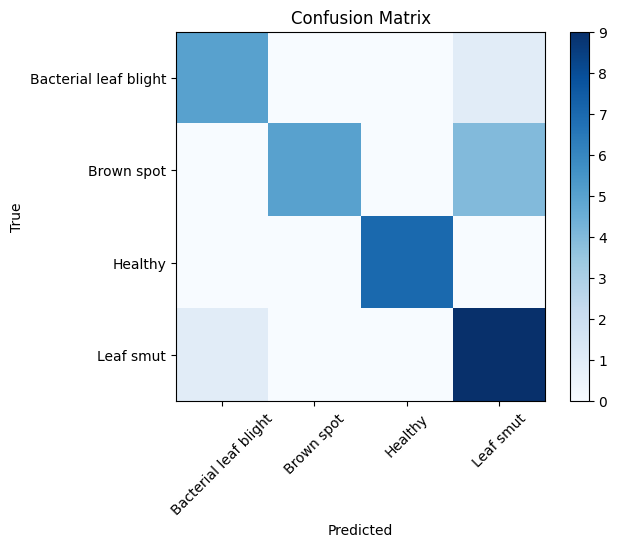

<ipython-input-9-cf3dd89330d7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=acc_per_class, palette='Blues')


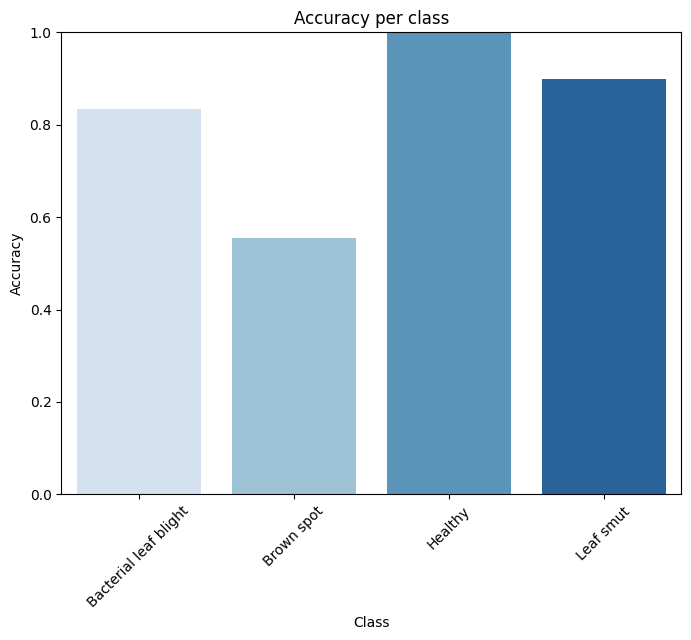

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns


# Predict on test set
y_pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(le.classes_))
plt.xticks(tick_marks, le.classes_, rotation=45)
plt.yticks(tick_marks, le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot accuracy over classes
acc_per_class = cm.diagonal()/cm.sum(axis=1)
plt.figure(figsize=(8,6))
sns.barplot(x=le.classes_, y=acc_per_class, palette='Blues')
plt.title('Accuracy per class')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [10]:
# save the model as a .joblib file
import joblib
joblib.dump(rf, 'model.joblib')

['model.joblib']

In [11]:
!ls

drive  model.joblib  sample_data


In [12]:
import os

cwd = os.getcwd()
print(cwd)

/content


In [13]:
import os

directory = '/content/drive/MyDrive/rice_leaf_diseases'
print(os.listdir(directory))

['Leaf smut', 'Bacterial leaf blight', 'Brown spot', 'Healthy']


In [14]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create label encoder and fit to labels
le = LabelEncoder()
labels = ['Brown spot', 'Bacterial leaf blight', 'Leaf smut', 'Healthy']
le.fit(labels)

# Save label encoder
joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']

In [15]:
import cv2
import numpy as np

class ImageClassifier:
    def __init__(self, model_path, label_encoder_path):
        self.img_path = None
        self.rf = joblib.load(model_path)
        self.le = joblib.load(label_encoder_path)

    def classify_image(self, img_path):
        self.img_path = img_path
        # Read the input image
        img = cv2.imread(self.img_path)
        # Resize the image to a fixed size of 224x224 pixels
        img = cv2.resize(img, (224, 224))
        # Flatten the image array to a 1D array
        img = img.flatten().reshape(1, -1)
        # Make prediction
        prediction = self.rf.predict(img)
        class_name = self.le.inverse_transform(prediction)
        return class_name[0]


In [16]:
import os
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

class ImageClassifier:

    def __init__(self):
        self.rf = RandomForestClassifier(n_estimators=100, random_state=42)
        self.le = LabelEncoder()
        self.load_model()

        self.upload_button = widgets.Button(description='Upload Image')
        self.upload_button.on_click(self.upload_image)

        self.classify_button = widgets.Button(description='Classify Image', disabled=True)
        self.classify_button.on_click(self.classify_image)

        self.quit_button = widgets.Button(description='Quit')
        self.quit_button.on_click(self.quit)

        self.buttons_box = widgets.HBox([self.upload_button, self.classify_button, self.quit_button])

        self.result_box = widgets.VBox([])

        self.main_box = widgets.VBox([self.buttons_box, self.result_box])

        display(self.main_box)

    def load_model(self):
        # Load model and label encoder
        model_dir = "/content/drive/MyDrive/rice_leaf_diseases"
        model_path = os.path.join(model_dir, "/content/model.joblib")
        self.rf = joblib.load(model_path)

        le_path = os.path.join(model_dir, "/content/label_encoder.joblib")
        self.le = joblib.load(le_path)

    def upload_image(self, button):
        # Open file dialog to select image file
        uploaded_file = files.upload()
        if uploaded_file:
            self.img_path = list(uploaded_file.keys())[0]
            self.classify_button.disabled = False

            # Show selected image
            img_widget = widgets.Image(value=uploaded_file[self.img_path], width=300, height=300)
            self.result_box.children = [img_widget]

    def classify_image(self, button):
        # Load and preprocess image
        img = cv2.imread(self.img_path)
        img_orig = cv2.resize(img, (224, 224))
        img = img_orig.flatten()
        img = np.array([img])

        # Make prediction
        prediction = self.rf.predict(img)
        class_name = self.le.inverse_transform(prediction)

        # Show predicted class on image
        cv2.putText(img_orig, class_name[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        _, img_encoded = cv2.imencode('.png', img_orig)
        img_widget = widgets.Image(value=img_encoded.tobytes(), width=300, height=300)
        self.result_box.children = [img_widget]

    def quit(self, button):
        # Close the GUI window
        self.main_box.close()


# Create an instance of the ImageClassifier class to start the GUI
classifier = ImageClassifier()


Saving DSC_0101.jpg to DSC_0101.jpg


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reshape data for KNN and Decision Tree classifiers
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
X_train_knn = np.reshape(X_train, (num_samples_train, -1))
X_test_knn = np.reshape(X_test, (num_samples_test, -1))
X_train_dt = np.reshape(X_train, (num_samples_train, -1))
X_test_dt = np.reshape(X_test, (num_samples_test, -1))

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train classifier on training set
knn.fit(X_train_knn, y_train)

# Evaluate classifier on test set
accuracy_knn = accuracy_score(y_test, knn.predict(X_test_knn))
print("KNN Test accuracy:", accuracy_knn)

# Create Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train classifier on training set
dt.fit(X_train_dt, y_train)

# Evaluate classifier on test set
accuracy_dt = accuracy_score(y_test, dt.predict(X_test_dt))
print("Decision Tree Test accuracy:", accuracy_dt)


KNN Test accuracy: 0.65625
Decision Tree Test accuracy: 0.6875


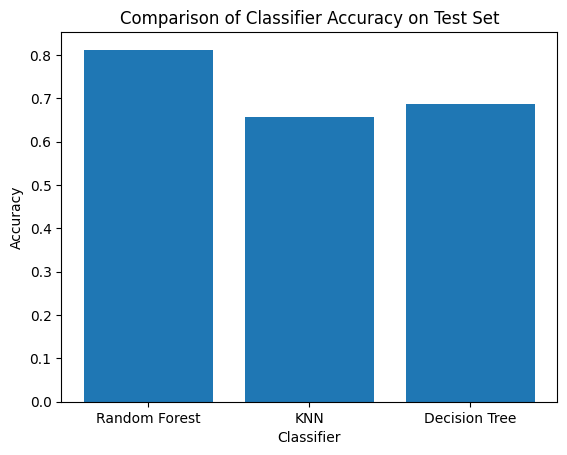

In [18]:
import matplotlib.pyplot as plt

# Create classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)

# Train classifiers on training set
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Evaluate classifiers on test set
rf_acc = rf.score(X_test, y_test)
knn_acc = knn.score(X_test, y_test)
dt_acc = dt.score(X_test, y_test)

# Plot bar graph
labels = ['Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [rf_acc, knn_acc, dt_acc]
plt.bar(labels, accuracy_scores)
plt.title('Comparison of Classifier Accuracy on Test Set')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()
